# Недостаток RANDU


In [1]:
from math import cos, pi
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random

A = 65539
mod = 2**31
seed = 1
ndots = 10000

In [2]:
class Generator:
    def __init__(self, mul, mod,seed):
        self.mul = mul
        self.mod = mod
        self.div = mod**(-1)
        self.currvalue = seed
        self.seed = seed
    def rand(self):
        self.currvalue = (self.currvalue*self.mul) % self.mod
        return self.currvalue*self.div
    def rewind(self):
        self.currvalue = self.seed

### Можно получить связь между тремя последовательными значениями датчика RANDU
### $x_{k+2} \equiv 65539x_{k+1} \equiv (2^{16}+3)^2x_k \equiv \\ \equiv(2^{32}+6*2^{16}+9)x_k \equiv 6 \cdot65539x_{k}-9x_k$
### $9x_k-6x_{k+1}+x_{k+2} = c*2^{31}, \ c \in \mathbb{Z}$
### Поэтому значения, выдаваемые генератором $y_i = x_i/2^{31}$, лежат на плоскостях
### $9x-6y+z = c,\ x,y,z \in [0,1]$
### Изобразим их

In [3]:
gen = Generator(A, mod, seed)
values = [gen.rand() for _ in range(ndots)]

Text(0.5, 0, 'z')

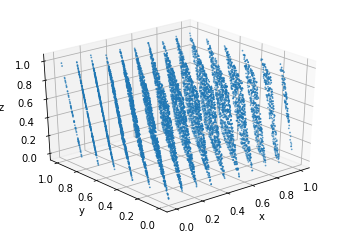

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(values[:ndots-2], values[1:ndots-1], values[2:], s=0.6)

ax.view_init(30, -130)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Видим, что точки действительно лежат на плоскостях
### Зная выражение для плоскостей, легко можно придумать интеграл, который метод Монте-Карло с датчиком RANDU посчитает плохо
### $I = \iiint_{[0,1]^3}\cos^2((9x-6y+z)\pi)dxdydz = 0.5$

In [5]:
f = lambda x,y,z: cos((9*x-6*y+z)*pi)**2

In [6]:
def rand3():
    return gen.rand(), gen.rand(), gen.rand()
#Метод Монте-Карло, основанный на RANDU
def MCmethod(func,xlimits, ylimits, zlimits, niters):
    s = 0
    for _ in range(niters):
        x, y, z = rand3()
        s+=func(x,y,z)
    return s*(xlimits[1]-xlimits[0])*(ylimits[1]-ylimits[0])*(zlimits[1]-zlimits[0])/niters
        

In [7]:
MCmethod(f,[0,1],[0,1],[0,1], 1000)

1.0

In [8]:
MCmethod(f,[0,1],[0,1],[0,1], 10000)

1.0

In [9]:
MCmethod(f,[0,1],[0,1],[0,1], 100000)

1.0

### Так как Python random использует для генерации алгоритм Mersenne Twister, достаточно подключить обычную библиотеку random

In [10]:
def rand3_MT():
    return random.random(), random.random(), random.random()
#Метод Монте-Карло, основанный на Mersenne Twister
def MCmethod_MT(func,xlimits, ylimits, zlimits, niters):
    s = 0
    for _ in range(niters):
        x, y, z = rand3_MT()
        s+=func(x,y,z)
    return s*(xlimits[1]-xlimits[0])*(ylimits[1]-ylimits[0])*(zlimits[1]-zlimits[0])/niters
   

In [11]:
MCmethod_MT(f,[0,1],[0,1],[0,1], 1000)

0.5155633789465726

In [12]:
MCmethod_MT(f,[0,1],[0,1],[0,1], 10000)

0.5028943089915939

In [13]:
MCmethod_MT(f,[0,1],[0,1],[0,1], 100000)

0.5000331625114325

### Таким образом, видим, что Mersenne Twister даёт хорошую оценку интеграла в отличие от RANDU


